1. A) Using the training and test sets specified in the syllabus, perform the following tasks:
A) On the madelon dataset, train decision trees of maximum depth 1, 2, .... up to
12, for a total of 12 decision trees. If your package does not allow the max depth
as a parameter, train trees with 21, 22, ..., 212 nodes, again a total of 12 trees. Use
the trained trees to predict the class labels on the training and test sets, and obtain
the training and test misclassification errors. Plot on the same graph the training
and test misclassification errors vs tree depth (or log2 of nodes) as two separate
curves. Report in a table the minimum test error and the tree depth (number of
nodes or splits) for which the minimum was attained.

In [2]:
# Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import zero_one_loss


In [ ]:
# Importing the training data
mad_train_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/MADELON/madelon_train.data", sep=" ", header=None)
mad_train_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/MADELON/madelon_train.labels", sep=" ", header=None)

# Importing the test data
mad_test_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/MADELON/madelon_valid.data", sep=" ", header=None)
mad_test_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/MADELON/madelon_valid.labels", sep=" ", header=None)

In [20]:
# After looking at the data, I noticed that the last column in mad_train_input and mad_test_input were NaN, so I am removing this column
mad_train_input = mad_train_input.dropna(axis=1, how='all')
mad_test_input = mad_test_input.dropna(axis=1, how='all')

In [21]:
# Calling on both new datasets to see if they are full of values now
print("Training input:", mad_train_input.head())
print("Testing input:", mad_test_input.head())

Training input:    0    1    2    3    4    5    6    7    8    9    ...  490  491  492  493  \
0  485  477  537  479  452  471  491  476  475  473  ...  477  481  477  485   
1  483  458  460  487  587  475  526  479  485  469  ...  463  478  487  338   
2  487  542  499  468  448  471  442  478  480  477  ...  487  481  492  650   
3  480  491  510  485  495  472  417  474  502  476  ...  491  480  474  572   
4  484  502  528  489  466  481  402  478  487  468  ...  488  479  452  435   

   494  495  496  497  498  499  
0  511  485  481  479  475  496  
1  513  486  483  492  510  517  
2  506  501  480  489  499  498  
3  454  469  475  482  494  461  
4  486  508  481  504  495  511  

[5 rows x 500 columns]
Testing input:    0    1    2    3    4    5    6    7    8    9    ...  490  491  492  493  \
0  483  454  513  495  523  469  453  477  506  479  ...  455  480  543  259   
1  485  508  493  487  478  472  504  476  479  475  ...  486  480  535  534   
2  483  521  507  47

In [22]:
# Checking the shape of my datasets
print("Training input shape:", mad_train_input.shape)
print("Training output shape:", mad_train_output.shape)
print("Testing input shape:", mad_test_input.shape)
print("Testing output shape:", mad_test_output.shape)

Training input shape: (2000, 500)
Training output shape: (2000, 1)
Testing input shape: (600, 500)
Testing output shape: (600, 1)


In [23]:
# The training and testing outputs are both 2D. Since I am doing a classification problem in scikit-learn, the output must be 1D because each sample input needs to match up to exactly 1 target value / output
mad_train_output = mad_train_output.squeeze()
mad_test_output = mad_test_output.squeeze()

In [24]:
# Rechecking to make sure this worked 
print("Training output shape:", mad_train_output.shape)
print("Testing output shape:", mad_test_output.shape)

Training output shape: (2000,)
Testing output shape: (600,)


In [25]:
# I need to make sure that the columns of the testing and training data are alligned
mad_test_input = mad_test_input.reindex(columns=mad_train_input.columns, fill_value=0)

In [26]:
# Creating blank sets to store all of the errors in
mad_train_errors=[]
mad_test_errors=[]
max_depths=range(1, 13)

In [27]:
# Creating a Decision Tree with a max depth of 12 (as set up above)
for depth in max_depths:
    mad_tree = DecisionTreeClassifier(max_depth=depth)
    mad_tree = mad_tree.fit(mad_train_input, mad_train_output)

    mad_train_predic = mad_tree.predict(mad_train_input)
    mad_tr_error = zero_one_loss(mad_train_output, mad_train_predic)
    mad_train_errors.append(mad_tr_error)

    mad_test_predic = mad_tree.predict(mad_test_input)
    mad_te_error = zero_one_loss(mad_test_output, mad_test_predic)
    mad_test_errors.append(mad_te_error)

In [28]:
# Print the Training misclassification errors respective to each tree depth
for depth in max_depths:
    print(f"The training misclassification error at depth {depth} is:", mad_train_errors[depth-1])


The training misclassification error at depth 1 is: 0.37749999999999995
The training misclassification error at depth 2 is: 0.349
The training misclassification error at depth 3 is: 0.2835
The training misclassification error at depth 4 is: 0.20750000000000002
The training misclassification error at depth 5 is: 0.14100000000000001
The training misclassification error at depth 6 is: 0.08799999999999997
The training misclassification error at depth 7 is: 0.05300000000000005
The training misclassification error at depth 8 is: 0.03600000000000003
The training misclassification error at depth 9 is: 0.019499999999999962
The training misclassification error at depth 10 is: 0.010499999999999954
The training misclassification error at depth 11 is: 0.005499999999999949
The training misclassification error at depth 12 is: 0.0020000000000000018


In [29]:
# Print the Testing misclassification errors respective to each tree depth
for depth in max_depths:
    print(f"The testing misclassification error at depth {depth} is:", mad_test_errors[depth-1])

The testing misclassification error at depth 1 is: 0.3883333333333333
The testing misclassification error at depth 2 is: 0.33499999999999996
The testing misclassification error at depth 3 is: 0.28500000000000003
The testing misclassification error at depth 4 is: 0.2516666666666667
The testing misclassification error at depth 5 is: 0.20999999999999996
The testing misclassification error at depth 6 is: 0.19333333333333336
The testing misclassification error at depth 7 is: 0.20833333333333337
The testing misclassification error at depth 8 is: 0.22999999999999998
The testing misclassification error at depth 9 is: 0.22166666666666668
The testing misclassification error at depth 10 is: 0.24
The testing misclassification error at depth 11 is: 0.2366666666666667
The testing misclassification error at depth 12 is: 0.245


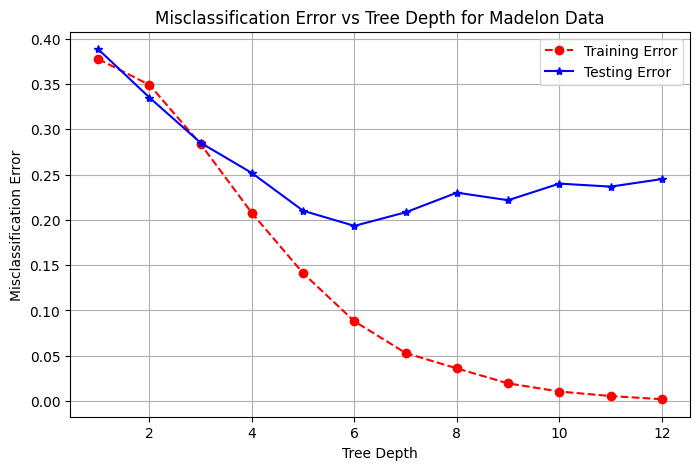

In [30]:
# Plot the training and test misclassification errors vs tree depth for madelon data
plt.figure(figsize=(8,5))
plt.plot(range(1,13), mad_train_errors, linestyle='--', marker='o', color='red', label='Training Error')
plt.plot(range(1,13), mad_test_errors, linestyle='-', marker='*', color='blue', label='Testing Error')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Tree Depth for Madelon Data')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# Report in a table the minimum test error and its depth for madelon data
min_test_error = np.min(mad_test_errors)
best_depth = max_depths[np.argmin(mad_test_errors)]
table = pd.DataFrame({
    'Category':['Minimum Testing Error', 'Best Tree Depth'],
    'Value' : [min_test_error, best_depth]
    })
print(table)

                Category     Value
0  Minimum Testing Error  0.193333
1        Best Tree Depth  6.000000


B) Repeat point A) on the satimage, Gisette, hill-valley and wilt datasets.

SATIMAGE

In [ ]:
# Importing the training data
sat_train_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/satimage/X.dat", sep=" ", header=None)
sat_train_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/satimage/Y.dat", sep=" ", header=None)

# Importing the test data
sat_test_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/satimage/Xtest.dat", sep=" ", header=None)
sat_test_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/satimage/Ytest.dat", sep=" ", header=None)

In [6]:
# Checking the shape of my datasets
print("Training input shape:", sat_train_input.shape)
print("Training output shape:", sat_train_output.shape)
print("Testing input shape:", sat_test_input.shape)
print("Testing output shape:", sat_test_output.shape)

Training input shape: (4435, 36)
Training output shape: (4435, 1)
Testing input shape: (2000, 36)
Testing output shape: (2000, 1)


In [7]:
# The training and testing outputs are both 2D. Since I am doing a classification problem in scikit-learn, the output must be 1D because each sample input needs to match up to exactly 1 target value / output
sat_train_output = sat_train_output.squeeze()
sat_test_output = sat_test_output.squeeze()

In [8]:
# Rechecking to make sure this worked 
print("Training output shape:", sat_train_output.shape)
print("Testing output shape:", sat_test_output.shape)

Training output shape: (4435,)
Testing output shape: (2000,)


In [9]:
# I need to make sure that the columns of the testing and training data are alligned
sat_test_input = sat_test_input.reindex(columns=sat_train_input.columns, fill_value=0)

In [10]:
# Creating blank sets to store all of the errors in
sat_train_errors=[]
sat_test_errors=[]
max_depths=range(1, 13)

In [11]:
# Creating a Decision Tree with a max depth of 12 (as set up above)
for depth in max_depths:
    sat_tree = DecisionTreeClassifier(max_depth=depth)
    sat_tree = sat_tree.fit(sat_train_input, sat_train_output)

    sat_train_predic = sat_tree.predict(sat_train_input)
    sat_tr_error = zero_one_loss(sat_train_output, sat_train_predic)
    sat_train_errors.append(sat_tr_error)

    sat_test_predic = sat_tree.predict(sat_test_input)
    sat_te_error = zero_one_loss(sat_test_output, sat_test_predic)
    sat_test_errors.append(sat_te_error)

In [12]:
# Print the Training misclassification errors respective to each tree depth
for depth in max_depths:
    print(f"The training misclassification error at depth {depth} is:", sat_train_errors[depth-1])

The training misclassification error at depth 1 is: 0.5598647125140924
The training misclassification error at depth 2 is: 0.3645997745208568
The training misclassification error at depth 3 is: 0.2121758737316798
The training misclassification error at depth 4 is: 0.18263810597519725
The training misclassification error at depth 5 is: 0.15377677564825254
The training misclassification error at depth 6 is: 0.1276211950394589
The training misclassification error at depth 7 is: 0.09921082299887263
The training misclassification error at depth 8 is: 0.07801578354002259
The training misclassification error at depth 9 is: 0.05907553551296507
The training misclassification error at depth 10 is: 0.04441939120631344
The training misclassification error at depth 11 is: 0.029537767756482536
The training misclassification error at depth 12 is: 0.01871476888387824


In [13]:
# Print the Testing misclassification errors respective to each tree depth
for depth in max_depths:
    print(f"The testing misclassification error at depth {depth} is:", sat_test_errors[depth-1])

The testing misclassification error at depth 1 is: 0.5875
The testing misclassification error at depth 2 is: 0.39149999999999996
The testing misclassification error at depth 3 is: 0.23750000000000004
The testing misclassification error at depth 4 is: 0.21550000000000002
The testing misclassification error at depth 5 is: 0.19299999999999995
The testing misclassification error at depth 6 is: 0.16600000000000004
The testing misclassification error at depth 7 is: 0.15500000000000003
The testing misclassification error at depth 8 is: 0.14500000000000002
The testing misclassification error at depth 9 is: 0.14449999999999996
The testing misclassification error at depth 10 is: 0.13949999999999996
The testing misclassification error at depth 11 is: 0.13649999999999995
The testing misclassification error at depth 12 is: 0.14149999999999996


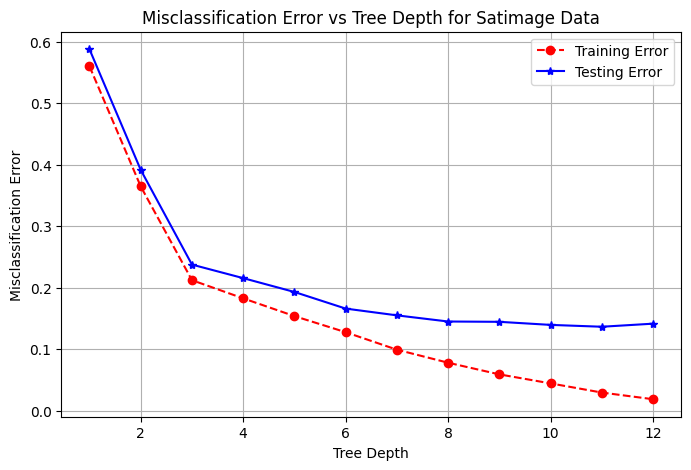

In [14]:
# Plot the training and test misclassification errors vs tree depth for satimage data
plt.figure(figsize=(8,5))
plt.plot(range(1,13), sat_train_errors, linestyle='--', marker='o', color='red', label='Training Error')
plt.plot(range(1,13), sat_test_errors, linestyle='-', marker='*', color='blue', label='Testing Error')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Tree Depth for Satimage Data')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
# Report in a table the minimum test error and its depth for satimage data
min_test_error = np.min(sat_test_errors)
best_depth = max_depths[np.argmin(sat_test_errors)]
table = pd.DataFrame({
    'Category':['Minimum Testing Error', 'Best Tree Depth'],
    'Value' : [min_test_error, best_depth]
    })
print(table)

                Category    Value
0  Minimum Testing Error   0.1365
1        Best Tree Depth  11.0000


GISETTE

In [ ]:
# Importing the training data
gis_train_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/Gisette/gisette_train.data", sep=" ", header=None)
gis_train_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/Gisette/gisette_train.labels", sep=" ", header=None)

# Importing the test data
gis_test_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/Gisette/gisette_valid.data", sep=" ", header=None)
gis_test_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/Gisette/gisette_valid.labels", sep=" ", header=None)

In [17]:
# After looking at the data, I noticed that the last column in mad_train_input and mad_test_input were NaN, so I am removing this column
gis_train_input = gis_train_input.dropna(axis=1, how='all')
gis_test_input = gis_test_input.dropna(axis=1, how='all')

In [18]:
# Checking the shape of my datasets
print("Training input shape:", gis_train_input.shape)
print("Training output shape:", gis_train_output.shape)
print("Testing input shape:", gis_test_input.shape)
print("Testing output shape:", gis_test_output.shape)

Training input shape: (6000, 5000)
Training output shape: (6000, 1)
Testing input shape: (1000, 5000)
Testing output shape: (1000, 1)


In [19]:
# The training and testing outputs are both 2D. Since I am doing a classification problem in scikit-learn, the output must be 1D because each sample input needs to match up to exactly 1 target value / output
gis_train_output = gis_train_output.squeeze()
gis_test_output = gis_test_output.squeeze()

In [20]:
# Rechecking to make sure this worked 
print("Training output shape:", gis_train_output.shape)
print("Testing output shape:", gis_test_output.shape)

Training output shape: (6000,)
Testing output shape: (1000,)


In [21]:
# I need to make sure that the columns of the testing and training data are alligned
gis_test_input = gis_test_input.reindex(columns=gis_train_input.columns, fill_value=0)

In [22]:
# Creating blank sets to store all of the errors in
gis_train_errors=[]
gis_test_errors=[]
max_depths=range(1, 13)

In [23]:
# Creating a Decision Tree with a max depth of 12 (as set up above)
for depth in max_depths:
    gis_tree = DecisionTreeClassifier(max_depth=depth)
    gis_tree = gis_tree.fit(gis_train_input, gis_train_output)

    gis_train_predic = gis_tree.predict(gis_train_input)
    gis_tr_error = zero_one_loss(gis_train_output, gis_train_predic)
    gis_train_errors.append(gis_tr_error)

    gis_test_predic = gis_tree.predict(gis_test_input)
    gis_te_error = zero_one_loss(gis_test_output, gis_test_predic)
    gis_test_errors.append(gis_te_error)

In [24]:
# Print the Training misclassification errors respective to each tree depth
for depth in max_depths:
    print(f"The training misclassification error at depth {depth} is:", gis_train_errors[depth-1])

The training misclassification error at depth 1 is: 0.16200000000000003
The training misclassification error at depth 2 is: 0.10583333333333333
The training misclassification error at depth 3 is: 0.07699999999999996
The training misclassification error at depth 4 is: 0.0651666666666667
The training misclassification error at depth 5 is: 0.05049999999999999
The training misclassification error at depth 6 is: 0.04383333333333328
The training misclassification error at depth 7 is: 0.032333333333333325
The training misclassification error at depth 8 is: 0.022666666666666613
The training misclassification error at depth 9 is: 0.01733333333333331
The training misclassification error at depth 10 is: 0.014499999999999957
The training misclassification error at depth 11 is: 0.013333333333333308
The training misclassification error at depth 12 is: 0.012666666666666715


In [25]:
# Print the Testing misclassification errors respective to each tree depth
for depth in max_depths:
    print(f"The testing misclassification error at depth {depth} is:", gis_test_errors[depth-1])

The testing misclassification error at depth 1 is: 0.16900000000000004
The testing misclassification error at depth 2 is: 0.125
The testing misclassification error at depth 3 is: 0.09199999999999997
The testing misclassification error at depth 4 is: 0.08499999999999996
The testing misclassification error at depth 5 is: 0.08599999999999997
The testing misclassification error at depth 6 is: 0.08199999999999996
The testing misclassification error at depth 7 is: 0.06999999999999995
The testing misclassification error at depth 8 is: 0.06399999999999995
The testing misclassification error at depth 9 is: 0.06299999999999994
The testing misclassification error at depth 10 is: 0.062000000000000055
The testing misclassification error at depth 11 is: 0.06399999999999995
The testing misclassification error at depth 12 is: 0.062000000000000055


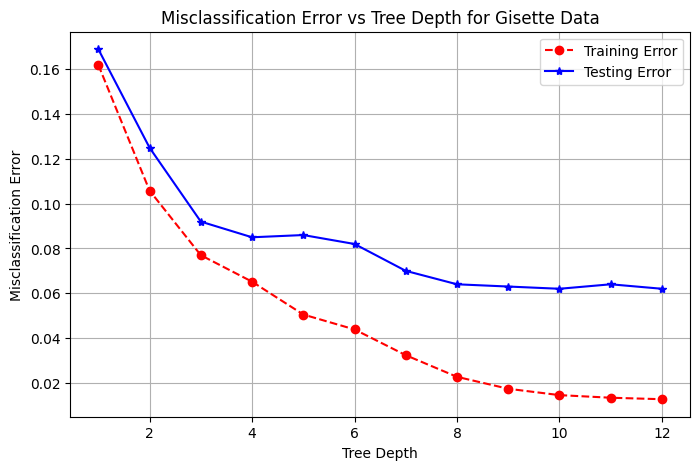

In [26]:
# Plot the training and test misclassification errors vs tree depth for Gisette data
plt.figure(figsize=(8,5))
plt.plot(range(1,13), gis_train_errors, linestyle='--', marker='o', color='red', label='Training Error')
plt.plot(range(1,13), gis_test_errors, linestyle='-', marker='*', color='blue', label='Testing Error')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Tree Depth for Gisette Data')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Report in a table the minimum test error and its depth for Gisette data
min_test_error = np.min(gis_test_errors)
best_depth = max_depths[np.argmin(gis_test_errors)]
table = pd.DataFrame({
    'Category':['Minimum Testing Error', 'Best Tree Depth'],
    'Value' : [min_test_error, best_depth]
    })
print(table)

                Category   Value
0  Minimum Testing Error   0.062
1        Best Tree Depth  10.000


HILL-VALLEY

In [ ]:
# Importing the training data
hv_train_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/hill-valley/X.dat", sep=" ", header=None)
hv_train_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/hill-valley/Y.dat", sep=" ", header=None)

# Importing the test data
hv_test_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/hill-valley/Xtest.dat", sep=" ", header=None)
hv_test_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/hill-valley/Ytest.dat", sep=" ", header=None)

In [29]:
# Checking the shape of my datasets
print("Training input shape:", hv_train_input.shape)
print("Training output shape:", hv_train_output.shape)
print("Testing input shape:", hv_test_input.shape)
print("Testing output shape:", hv_test_output.shape)

Training input shape: (606, 100)
Training output shape: (606, 1)
Testing input shape: (606, 100)
Testing output shape: (606, 1)


In [30]:
# The training and testing outputs are both 2D. Since I am doing a classification problem in scikit-learn, the output must be 1D because each sample input needs to match up to exactly 1 target value / output
hv_train_output = hv_train_output.squeeze()
hv_test_output = hv_test_output.squeeze()

In [31]:
# Rechecking to make sure this worked 
print("Training output shape:", hv_train_output.shape)
print("Testing output shape:", hv_test_output.shape)

Training output shape: (606,)
Testing output shape: (606,)


In [32]:
# I need to make sure that the columns of the testing and training data are alligned
hv_test_input = hv_test_input.reindex(columns=hv_train_input.columns, fill_value=0)

In [33]:
# Creating blank sets to store all of the errors in
hv_train_errors=[]
hv_test_errors=[]
max_depths=range(1, 13)

In [34]:
# Creating a Decision Tree with a max depth of 12 (as set up above)
for depth in max_depths:
    hv_tree = DecisionTreeClassifier(max_depth=depth)
    hv_tree = hv_tree.fit(hv_train_input, hv_train_output)

    hv_train_predic = hv_tree.predict(hv_train_input)
    hv_tr_error = zero_one_loss(hv_train_output, hv_train_predic)
    hv_train_errors.append(hv_tr_error)

    hv_test_predic = hv_tree.predict(hv_test_input)
    hv_te_error = zero_one_loss(hv_test_output, hv_test_predic)
    hv_test_errors.append(hv_te_error)

In [35]:
# Print the Training misclassification errors respective to each tree depth
for depth in max_depths:
    print(f"The training misclassification error at depth {depth} is:", hv_train_errors[depth-1])

The training misclassification error at depth 1 is: 0.43234323432343236
The training misclassification error at depth 2 is: 0.4191419141914191
The training misclassification error at depth 3 is: 0.41254125412541254
The training misclassification error at depth 4 is: 0.4108910891089109
The training misclassification error at depth 5 is: 0.38778877887788776
The training misclassification error at depth 6 is: 0.36963696369636967
The training misclassification error at depth 7 is: 0.36798679867986794
The training misclassification error at depth 8 is: 0.3547854785478548
The training misclassification error at depth 9 is: 0.3448844884488449
The training misclassification error at depth 10 is: 0.3267326732673267
The training misclassification error at depth 11 is: 0.3184818481848185
The training misclassification error at depth 12 is: 0.2706270627062707


In [36]:
# Print the Testing misclassification errors respective to each tree depth
for depth in max_depths:
    print(f"The testing misclassification error at depth {depth} is:", hv_test_errors[depth-1])

The testing misclassification error at depth 1 is: 0.48679867986798675
The testing misclassification error at depth 2 is: 0.48514851485148514
The testing misclassification error at depth 3 is: 0.4834983498349835
The testing misclassification error at depth 4 is: 0.48514851485148514
The testing misclassification error at depth 5 is: 0.4752475247524752
The testing misclassification error at depth 6 is: 0.4884488448844885
The testing misclassification error at depth 7 is: 0.4834983498349835
The testing misclassification error at depth 8 is: 0.46864686468646866
The testing misclassification error at depth 9 is: 0.4636963696369637
The testing misclassification error at depth 10 is: 0.4620462046204621
The testing misclassification error at depth 11 is: 0.4653465346534653
The testing misclassification error at depth 12 is: 0.4752475247524752


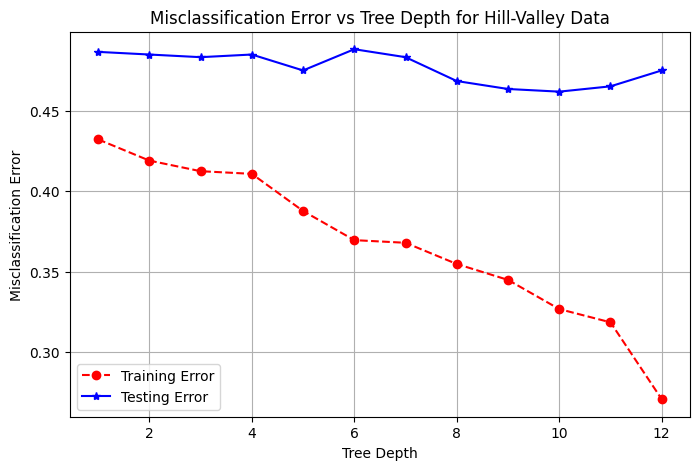

In [37]:
# Plot the training and test misclassification errors vs tree depth for hill-valley data
plt.figure(figsize=(8,5))
plt.plot(range(1,13), hv_train_errors, linestyle='--', marker='o', color='red', label='Training Error')
plt.plot(range(1,13), hv_test_errors, linestyle='-', marker='*', color='blue', label='Testing Error')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Tree Depth for Hill-Valley Data')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Report in a table the minimum test error and its depth for hill-valley data
min_test_error = np.min(hv_test_errors)
best_depth = max_depths[np.argmin(hv_test_errors)]
table = pd.DataFrame({
    'Category':['Minimum Testing Error', 'Best Tree Depth'],
    'Value' : [min_test_error, best_depth]
    })
print(table)

                Category      Value
0  Minimum Testing Error   0.462046
1        Best Tree Depth  10.000000


WILT

In [ ]:
# Importing the training data
wilt_train_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/wilt/wilt_train.csv", sep=",", header=None)
wilt_train_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/wilt/wilt_train.labels", sep=" ", header=None)

# Importing the test data
wilt_test_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/wilt/wilt_test.csv", sep=",", header=None)
wilt_test_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/wilt/wilt_test.labels", sep=" ", header=None)

In [41]:
# Checking the shape of my datasets
print("Training input shape:", wilt_train_input.shape)
print("Training output shape:", wilt_train_output.shape)
print("Testing input shape:", wilt_test_input.shape)
print("Testing output shape:", wilt_test_output.shape)               

Training input shape: (4339, 5)
Training output shape: (4339, 1)
Testing input shape: (500, 5)
Testing output shape: (500, 1)


In [42]:
# The training and testing outputs are both 2D. Since I am doing a classification problem in scikit-learn, the output must be 1D because each sample input needs to match up to exactly 1 target value / output
wilt_train_output = wilt_train_output.squeeze()
wilt_test_output = wilt_test_output.squeeze()

In [43]:
# Rechecking to make sure this worked 
print("Training output shape:", wilt_train_output.shape)
print("Testing output shape:", wilt_test_output.shape)

Training output shape: (4339,)
Testing output shape: (500,)


In [44]:
# I need to make sure that the columns of the testing and training data are alligned
wilt_test_input = wilt_test_input.reindex(columns=wilt_train_input.columns, fill_value=0)

In [45]:
# Creating blank sets to store all of the errors in
wilt_train_errors=[]
wilt_test_errors=[]
max_depths=range(1, 13)

In [46]:
# Creating a Decision Tree with a max depth of 12 (as set up above)
for depth in max_depths:
    wilt_tree = DecisionTreeClassifier(max_depth=depth)
    wilt_tree = wilt_tree.fit(wilt_train_input, wilt_train_output)

    wilt_train_predic = wilt_tree.predict(wilt_train_input)
    wilt_tr_error = zero_one_loss(wilt_train_output, wilt_train_predic)
    wilt_train_errors.append(wilt_tr_error)

    wilt_test_predic = wilt_tree.predict(wilt_test_input)
    wilt_te_error = zero_one_loss(wilt_test_output, wilt_test_predic)
    wilt_test_errors.append(wilt_te_error)

In [47]:
# Print the Training misclassification errors respective to each tree depth
for depth in max_depths:
    print(f"The training misclassification error at depth {depth} is:", wilt_train_errors[depth-1])

The training misclassification error at depth 1 is: 0.017054620880387228
The training misclassification error at depth 2 is: 0.00875777828992852
The training misclassification error at depth 3 is: 0.006914035492048831
The training misclassification error at depth 4 is: 0.003917953445494393
The training misclassification error at depth 5 is: 0.0016132749481447828
The training misclassification error at depth 6 is: 0.0006914035492049386
The training misclassification error at depth 7 is: 0.00023046784973501655
The training misclassification error at depth 8 is: 0.0
The training misclassification error at depth 9 is: 0.0
The training misclassification error at depth 10 is: 0.0
The training misclassification error at depth 11 is: 0.0
The training misclassification error at depth 12 is: 0.0


In [48]:
# Print the Testing misclassification errors respective to each tree depth
for depth in max_depths:
    print(f"The testing misclassification error at depth {depth} is:", wilt_test_errors[depth-1])

The testing misclassification error at depth 1 is: 0.374
The testing misclassification error at depth 2 is: 0.248
The testing misclassification error at depth 3 is: 0.23199999999999998
The testing misclassification error at depth 4 is: 0.20799999999999996
The testing misclassification error at depth 5 is: 0.19199999999999995
The testing misclassification error at depth 6 is: 0.18600000000000005
The testing misclassification error at depth 7 is: 0.19999999999999996
The testing misclassification error at depth 8 is: 0.18600000000000005
The testing misclassification error at depth 9 is: 0.19399999999999995
The testing misclassification error at depth 10 is: 0.18999999999999995
The testing misclassification error at depth 11 is: 0.19199999999999995
The testing misclassification error at depth 12 is: 0.20199999999999996


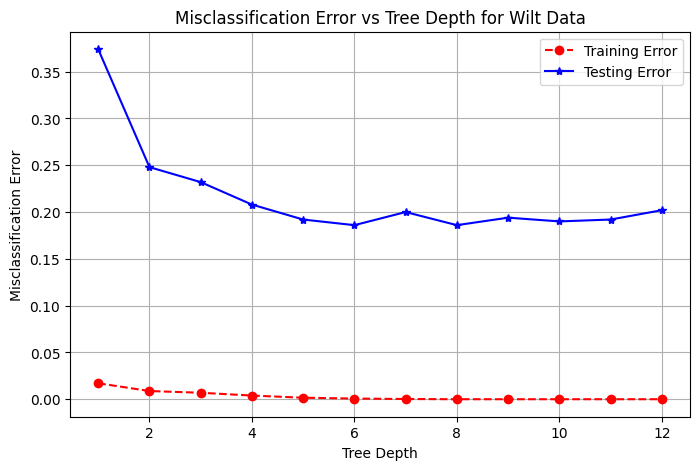

In [49]:
# Plot the training and test misclassification errors vs tree depth for Wilt data
plt.figure(figsize=(8,5))
plt.plot(range(1,13), wilt_train_errors, linestyle='--', marker='o', color='red', label='Training Error')
plt.plot(range(1,13), wilt_test_errors, linestyle='-', marker='*', color='blue', label='Testing Error')
plt.xlabel('Tree Depth')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Tree Depth for Wilt Data')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# Report in a table the minimum test error and its depth for wilt data
min_test_error = np.min(wilt_test_errors)
best_depth = max_depths[np.argmin(wilt_test_errors)]
table = pd.DataFrame({
    'Category':['Minimum Testing Error', 'Best Tree Depth'],
    'Value' : [min_test_error, best_depth]
    })
print(table)

                Category  Value
0  Minimum Testing Error  0.186
1        Best Tree Depth  6.000


C). On the madelon dataset, for each of k ∈ {3, 10, 30, 100, 300} train a random
forest with k trees where the split attribute at each node is chosen from a random
subset of 22 ≈ √500 features. Use the trained trees to predict the class labels on
the training and test sets, and obtain the training and test misclassification errors.
Plot on the same graph the training and test errors vs number of trees k as two
separate curves. Report the training and test misclassification errors in a table.

In [51]:
# Packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import zero_one_loss

In [ ]:
# Importing the training data
mad_train_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/MADELON/madelon_train.data", sep=" ", header=None)
mad_train_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/MADELON/madelon_train.labels", sep=" ", header=None)

# Importing the test data
mad_test_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/MADELON/madelon_valid.data", sep=" ", header=None)
mad_test_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/MADELON/madelon_valid.labels", sep=" ", header=None)

In [53]:
# After looking at the data, I noticed that the last column in mad_train_input and mad_test_input were NaN, so I am removing this column
mad_train_input = mad_train_input.dropna(axis=1, how='all')
mad_test_input = mad_test_input.dropna(axis=1, how='all')

In [54]:
# Calling on both new datasets to see if they are full of values now
print("Training input:", mad_train_input.head())
print("Testing input:", mad_test_input.head())

Training input:    0    1    2    3    4    5    6    7    8    9    ...  490  491  492  493  \
0  485  477  537  479  452  471  491  476  475  473  ...  477  481  477  485   
1  483  458  460  487  587  475  526  479  485  469  ...  463  478  487  338   
2  487  542  499  468  448  471  442  478  480  477  ...  487  481  492  650   
3  480  491  510  485  495  472  417  474  502  476  ...  491  480  474  572   
4  484  502  528  489  466  481  402  478  487  468  ...  488  479  452  435   

   494  495  496  497  498  499  
0  511  485  481  479  475  496  
1  513  486  483  492  510  517  
2  506  501  480  489  499  498  
3  454  469  475  482  494  461  
4  486  508  481  504  495  511  

[5 rows x 500 columns]
Testing input:    0    1    2    3    4    5    6    7    8    9    ...  490  491  492  493  \
0  483  454  513  495  523  469  453  477  506  479  ...  455  480  543  259   
1  485  508  493  487  478  472  504  476  479  475  ...  486  480  535  534   
2  483  521  507  47

In [55]:
# Checking the shape of my datasets
print("Training input shape:", mad_train_input.shape)
print("Training output shape:", mad_train_output.shape)
print("Testing input shape:", mad_test_input.shape)
print("Testing output shape:", mad_test_output.shape)

Training input shape: (2000, 500)
Training output shape: (2000, 1)
Testing input shape: (600, 500)
Testing output shape: (600, 1)


In [56]:
# The training and testing outputs are both 2D. Since I am doing a classification problem in scikit-learn, the output must be 1D because each sample input needs to match up to exactly 1 target value / output
mad_train_output = mad_train_output.squeeze()
mad_test_output = mad_test_output.squeeze()

In [57]:
# Rechecking to make sure this worked 
print("Training output shape:", mad_train_output.shape)
print("Testing output shape:", mad_test_output.shape)

Training output shape: (2000,)
Testing output shape: (600,)


In [58]:
# I need to make sure that the columns of the testing and training data are alligned
mad_test_input = mad_test_input.reindex(columns=mad_train_input.columns, fill_value=0)

In [59]:
# Creating blank sets to store all of the errors in
mad_train_errors=[]
mad_test_errors=[]
num_trees = [3, 10, 30, 100, 300]

In [60]:
# Create a Random Forest with k = [3, 10 ,30, 100, 300] trees (set up above) where the split attribute at each node is chosen from a random subset of 22 features
for n in num_trees:
    mad_forest = RandomForestClassifier(n_estimators=n, max_features=22)
    mad_forest.fit(mad_train_input, mad_train_output)

    mad_train_predic = mad_forest.predict(mad_train_input)
    mad_tr_error = zero_one_loss(mad_train_output, mad_train_predic)
    mad_train_errors.append(mad_tr_error)

    mad_test_predic = mad_forest.predict(mad_test_input)
    mad_te_error = zero_one_loss(mad_test_output, mad_test_predic)
    mad_test_errors.append(mad_te_error)

In [61]:
# Print the Training misclassification errors respective to each number of trees
for i in range(len(num_trees)):
    n = num_trees[i]
    print(f"The training misclassification error at {n} trees is:", mad_train_errors[i])

The training misclassification error at 3 trees is: 0.06999999999999995
The training misclassification error at 10 trees is: 0.010000000000000009
The training misclassification error at 30 trees is: 0.0
The training misclassification error at 100 trees is: 0.0
The training misclassification error at 300 trees is: 0.0


In [62]:
# Print the Testing misclassification errors respective to each number of trees
for i in range(len(num_trees)):
    n = num_trees[i]
    print(f"The testing misclassification error at {n} trees is:", mad_test_errors[i])

The testing misclassification error at 3 trees is: 0.3766666666666667
The testing misclassification error at 10 trees is: 0.3783333333333333
The testing misclassification error at 30 trees is: 0.33333333333333337
The testing misclassification error at 100 trees is: 0.2833333333333333
The testing misclassification error at 300 trees is: 0.2616666666666667


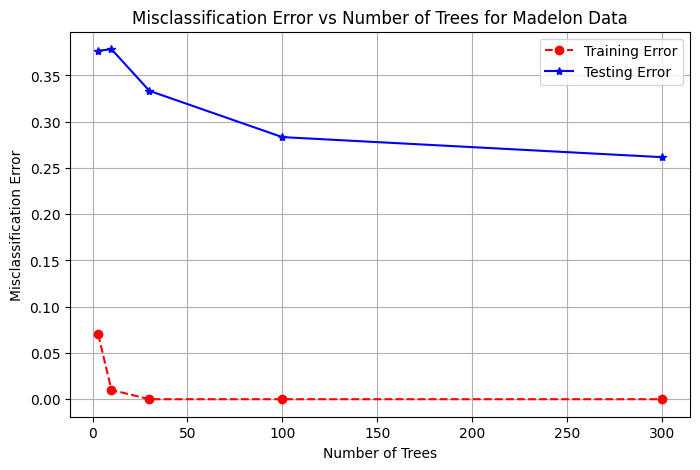

In [63]:
# Plot the training and test misclassification errors vs number of trees for madelon data
plt.figure(figsize=(8,5))
plt.plot(num_trees, mad_train_errors, linestyle='--', marker='o', color='red', label='Training Error')
plt.plot(num_trees, mad_test_errors, linestyle='-', marker='*', color='blue', label='Testing Error')
plt.xlabel('Number of Trees')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Number of Trees for Madelon Data')
plt.legend()
plt.grid(True)
plt.show()

In [64]:
# Report in a table the number of trees, training error, and test error for madelon data
table = pd.DataFrame({
    "Number of Trees": num_trees, 
    "Training Misclassification Error": mad_train_errors,
    "Testing Misclassification Error": mad_test_errors
})

print(table)

   Number of Trees  Training Misclassification Error  \
0                3                              0.07   
1               10                              0.01   
2               30                              0.00   
3              100                              0.00   
4              300                              0.00   

   Testing Misclassification Error  
0                         0.376667  
1                         0.378333  
2                         0.333333  
3                         0.283333  
4                         0.261667  


D) Repeat point C) on the satimage, Gisette and hill-valley datasets.

SATIMAGE

In [ ]:
# Importing the training data
sat_train_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/satimage/X.dat", sep=" ", header=None)
sat_train_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/satimage/Y.dat", sep=" ", header=None)

# Importing the test data
sat_test_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/satimage/Xtest.dat", sep=" ", header=None)
sat_test_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/satimage/Ytest.dat", sep=" ", header=None)

In [66]:
# Checking the shape of my datasets
print("Training input shape:", sat_train_input.shape)
print("Training output shape:", sat_train_output.shape)
print("Testing input shape:", sat_test_input.shape)
print("Testing output shape:", sat_test_output.shape)

Training input shape: (4435, 36)
Training output shape: (4435, 1)
Testing input shape: (2000, 36)
Testing output shape: (2000, 1)


In [67]:
# The training and testing outputs are both 2D. Since I am doing a classification problem in scikit-learn, the output must be 1D because each sample input needs to match up to exactly 1 target value / output
sat_train_output = sat_train_output.squeeze()
sat_test_output = sat_test_output.squeeze()

In [68]:
# Rechecking to make sure this worked 
print("Training output shape:", sat_train_output.shape)
print("Testing output shape:", sat_test_output.shape)

Training output shape: (4435,)
Testing output shape: (2000,)


In [69]:
# I need to make sure that the columns of the testing and training data are alligned
sat_test_input = sat_test_input.reindex(columns=sat_train_input.columns, fill_value=0)

In [70]:
# Creating blank sets to store all of the errors in
sat_train_errors=[]
sat_test_errors=[]
num_trees = [3, 10, 30, 100, 300]

In [71]:
# Create a Random Forest with k = [3, 10 ,30, 100, 300] trees (set up above) where the split attribute at each node is chosen from a random subset of 22 features
for n in num_trees:
    sat_forest = RandomForestClassifier(n_estimators=n, max_features=22)
    sat_forest.fit(sat_train_input, sat_train_output)

    sat_train_predic = sat_forest.predict(sat_train_input)
    sat_tr_error = zero_one_loss(sat_train_output, sat_train_predic)
    sat_train_errors.append(sat_tr_error)

    sat_test_predic = sat_forest.predict(sat_test_input)
    sat_te_error = zero_one_loss(sat_test_output, sat_test_predic)
    sat_test_errors.append(sat_te_error)

In [72]:
# Print the Training misclassification errors respective to each number of trees
for i in range(len(num_trees)):
    n = num_trees[i]
    print(f"The training misclassification error at {n} trees is:", sat_train_errors[i])

The training misclassification error at 3 trees is: 0.023449830890642565
The training misclassification error at 10 trees is: 0.006313416009019135
The training misclassification error at 30 trees is: 0.0009019165727169876
The training misclassification error at 100 trees is: 0.0
The training misclassification error at 300 trees is: 0.0


In [73]:
# Print the Testing misclassification errors respective to each number of trees
for i in range(len(num_trees)):
    n = num_trees[i]
    print(f"The testing misclassification error at {n} trees is:", sat_test_errors[i])

The testing misclassification error at 3 trees is: 0.13149999999999995
The testing misclassification error at 10 trees is: 0.10650000000000004
The testing misclassification error at 30 trees is: 0.09650000000000003
The testing misclassification error at 100 trees is: 0.09450000000000003
The testing misclassification error at 300 trees is: 0.09199999999999997


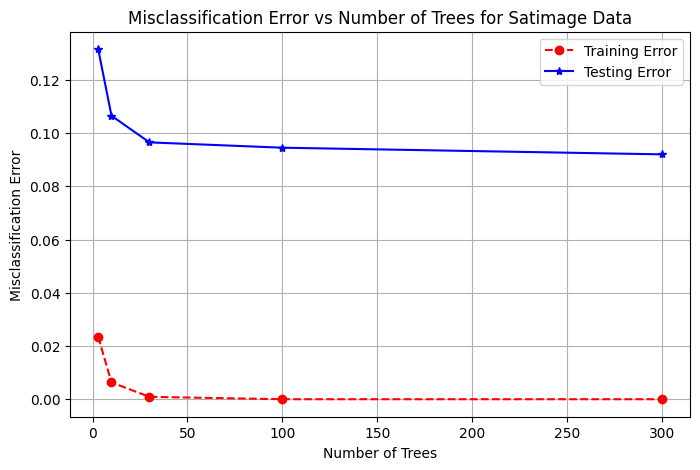

In [74]:
# Plot the training and test misclassification errors vs number of trees for Satimage data
plt.figure(figsize=(8,5))
plt.plot(num_trees, sat_train_errors, linestyle='--', marker='o', color='red', label='Training Error')
plt.plot(num_trees, sat_test_errors, linestyle='-', marker='*', color='blue', label='Testing Error')
plt.xlabel('Number of Trees')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Number of Trees for Satimage Data')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
# Report in a table the number of trees, training error, and test error for satimage data
table = pd.DataFrame({
    "Number of Trees": num_trees, 
    "Training Misclassification Error": sat_train_errors,
    "Testing Misclassification Error": sat_test_errors
})

print(table)

   Number of Trees  Training Misclassification Error  \
0                3                          0.023450   
1               10                          0.006313   
2               30                          0.000902   
3              100                          0.000000   
4              300                          0.000000   

   Testing Misclassification Error  
0                           0.1315  
1                           0.1065  
2                           0.0965  
3                           0.0945  
4                           0.0920  


GISETTE

In [ ]:
# Importing the training data
gis_train_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/Gisette/gisette_train.data", sep=" ", header=None)
gis_train_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/Gisette/gisette_train.labels", sep=" ", header=None)

# Importing the test data
gis_test_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/Gisette/gisette_valid.data", sep=" ", header=None)
gis_test_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/Gisette/gisette_valid.labels", sep=" ", header=None)

In [77]:
# After looking at the data, I noticed that the last column in mad_train_input and mad_test_input were NaN, so I am removing this column
gis_train_input = gis_train_input.dropna(axis=1, how='all')
gis_test_input = gis_test_input.dropna(axis=1, how='all')

In [78]:
# Checking the shape of my datasets
print("Training input shape:", gis_train_input.shape)
print("Training output shape:", gis_train_output.shape)
print("Testing input shape:", gis_test_input.shape)
print("Testing output shape:", gis_test_output.shape)

Training input shape: (6000, 5000)
Training output shape: (6000, 1)
Testing input shape: (1000, 5000)
Testing output shape: (1000, 1)


In [79]:
# The training and testing outputs are both 2D. Since I am doing a classification problem in scikit-learn, the output must be 1D because each sample input needs to match up to exactly 1 target value / output
gis_train_output = gis_train_output.squeeze()
gis_test_output = gis_test_output.squeeze()

In [80]:
# Rechecking to make sure this worked 
print("Training output shape:", gis_train_output.shape)
print("Testing output shape:", gis_test_output.shape)

Training output shape: (6000,)
Testing output shape: (1000,)


In [81]:
# I need to make sure that the columns of the testing and training data are alligned
gis_test_input = gis_test_input.reindex(columns=gis_train_input.columns, fill_value=0)

In [82]:
# Creating blank sets to store all of the errors in
gis_train_errors=[]
gis_test_errors=[]
num_trees = [3, 10, 30, 100, 300]

In [83]:
# Create a Random Forest with k = [3, 10 ,30, 100, 300] trees (set up above) where the split attribute at each node is chosen from a random subset of 22 features
for n in num_trees:
    gis_forest = RandomForestClassifier(n_estimators=n, max_features=22)
    gis_forest.fit(gis_train_input, gis_train_output)

    gis_train_predic = gis_forest.predict(gis_train_input)
    gis_tr_error = zero_one_loss(gis_train_output, gis_train_predic)
    gis_train_errors.append(gis_tr_error)

    gis_test_predic = gis_forest.predict(gis_test_input)
    gis_te_error = zero_one_loss(gis_test_output, gis_test_predic)
    gis_test_errors.append(gis_te_error)

In [84]:
# Print the Training misclassification errors respective to each number of trees
for i in range(len(num_trees)):
    n = num_trees[i]
    print(f"The training misclassification error at {n} trees is:", gis_train_errors[i])

The training misclassification error at 3 trees is: 0.015000000000000013
The training misclassification error at 10 trees is: 0.0023333333333332984
The training misclassification error at 30 trees is: 0.0001666666666666483
The training misclassification error at 100 trees is: 0.0
The training misclassification error at 300 trees is: 0.0


In [85]:
# Print the Testing misclassification errors respective to each number of trees
for i in range(len(num_trees)):
    n = num_trees[i]
    print(f"The testing misclassification error at {n} trees is:", gis_test_errors[i])

The testing misclassification error at 3 trees is: 0.11399999999999999
The testing misclassification error at 10 trees is: 0.052000000000000046
The testing misclassification error at 30 trees is: 0.03600000000000003
The testing misclassification error at 100 trees is: 0.03300000000000003
The testing misclassification error at 300 trees is: 0.027000000000000024


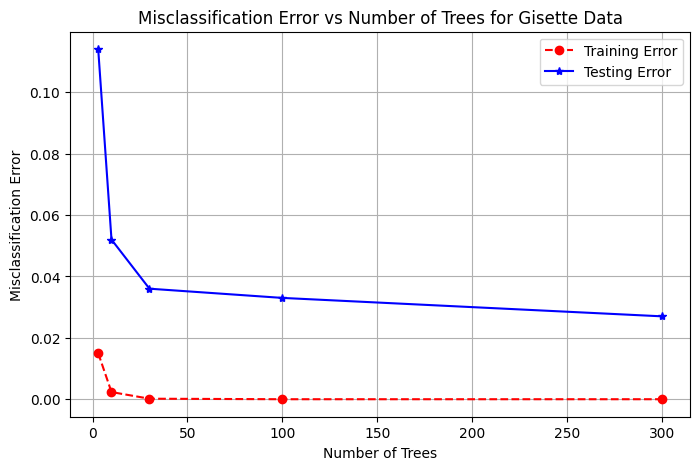

In [86]:
# Plot the training and test misclassification errors vs number of trees for Gisette data
plt.figure(figsize=(8,5))
plt.plot(num_trees, gis_train_errors, linestyle='--', marker='o', color='red', label='Training Error')
plt.plot(num_trees, gis_test_errors, linestyle='-', marker='*', color='blue', label='Testing Error')
plt.xlabel('Number of Trees')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Number of Trees for Gisette Data')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
# Report in a table the number of trees, training error, and test error for gisette data
table = pd.DataFrame({
    "Number of Trees": num_trees, 
    "Training Misclassification Error": gis_train_errors,
    "Testing Misclassification Error": gis_test_errors
})

print(table)

   Number of Trees  Training Misclassification Error  \
0                3                          0.015000   
1               10                          0.002333   
2               30                          0.000167   
3              100                          0.000000   
4              300                          0.000000   

   Testing Misclassification Error  
0                            0.114  
1                            0.052  
2                            0.036  
3                            0.033  
4                            0.027  


HILL_VALLEY

In [ ]:
# Importing the training data
hv_train_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/hill-valley/X.dat", sep=" ", header=None)
hv_train_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/hill-valley/Y.dat", sep=" ", header=None)

# Importing the test data
hv_test_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/hill-valley/Xtest.dat", sep=" ", header=None)
hv_test_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/hill-valley/Ytest.dat", sep=" ", header=None)

In [89]:
# Checking the shape of my datasets
print("Training input shape:", hv_train_input.shape)
print("Training output shape:", hv_train_output.shape)
print("Testing input shape:", hv_test_input.shape)
print("Testing output shape:", hv_test_output.shape)

Training input shape: (606, 100)
Training output shape: (606, 1)
Testing input shape: (606, 100)
Testing output shape: (606, 1)


In [90]:
# The training and testing outputs are both 2D. Since I am doing a classification problem in scikit-learn, the output must be 1D because each sample input needs to match up to exactly 1 target value / output
hv_train_output = hv_train_output.squeeze()
hv_test_output = hv_test_output.squeeze()

In [91]:
# Rechecking to make sure this worked 
print("Training output shape:", hv_train_output.shape)
print("Testing output shape:", hv_test_output.shape)

Training output shape: (606,)
Testing output shape: (606,)


In [92]:
# I need to make sure that the columns of the testing and training data are alligned
hv_test_input = hv_test_input.reindex(columns=hv_train_input.columns, fill_value=0)

In [93]:
# Creating blank sets to store all of the errors in
hv_train_errors=[]
hv_test_errors=[]
num_trees = [3, 10, 30, 100, 300]

In [94]:
# Create a Random Forest with k = [3, 10 ,30, 100, 300] trees (set up above) where the split attribute at each node is chosen from a random subset of 22 features
for n in num_trees:
    hv_forest = RandomForestClassifier(n_estimators=n, max_features=22)
    hv_forest.fit(hv_train_input, hv_train_output)

    hv_train_predic = hv_forest.predict(hv_train_input)
    hv_tr_error = zero_one_loss(hv_train_output, hv_train_predic)
    hv_train_errors.append(hv_tr_error)

    hv_test_predic = hv_forest.predict(hv_test_input)
    hv_te_error = zero_one_loss(hv_test_output, hv_test_predic)
    hv_test_errors.append(hv_te_error)

In [95]:
# Print the Training misclassification errors respective to each number of trees
for i in range(len(num_trees)):
    n = num_trees[i]
    print(f"The training misclassification error at {n} trees is:", hv_train_errors[i])

The training misclassification error at 3 trees is: 0.07920792079207917
The training misclassification error at 10 trees is: 0.02310231023102305
The training misclassification error at 30 trees is: 0.0066006600660065695
The training misclassification error at 100 trees is: 0.0
The training misclassification error at 300 trees is: 0.0


In [96]:
# Print the Testing misclassification errors respective to each number of trees
for i in range(len(num_trees)):
    n = num_trees[i]
    print(f"The testing misclassification error at {n} trees is:", hv_test_errors[i])

The testing misclassification error at 3 trees is: 0.45709570957095713
The testing misclassification error at 10 trees is: 0.4471947194719472
The testing misclassification error at 30 trees is: 0.43069306930693074
The testing misclassification error at 100 trees is: 0.4471947194719472
The testing misclassification error at 300 trees is: 0.4455445544554455


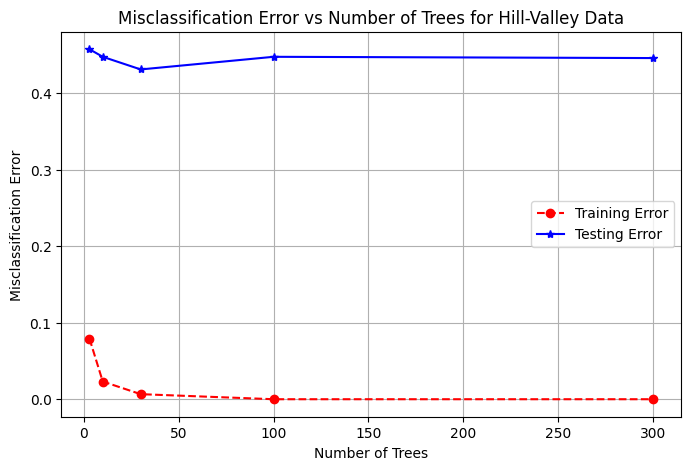

In [97]:
# Plot the training and test misclassification errors vs number of trees for hill-valley data
plt.figure(figsize=(8,5))
plt.plot(num_trees, hv_train_errors, linestyle='--', marker='o', color='red', label='Training Error')
plt.plot(num_trees, hv_test_errors, linestyle='-', marker='*', color='blue', label='Testing Error')
plt.xlabel('Number of Trees')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Number of Trees for Hill-Valley Data')
plt.legend()
plt.grid(True)
plt.show()

In [98]:
# Report in a table the number of trees, training error, and test error for hill-valley data
table = pd.DataFrame({
    "Number of Trees": num_trees, 
    "Training Misclassification Error": hv_train_errors,
    "Testing Misclassification Error": hv_test_errors
})

print(table)

   Number of Trees  Training Misclassification Error  \
0                3                          0.079208   
1               10                          0.023102   
2               30                          0.006601   
3              100                          0.000000   
4              300                          0.000000   

   Testing Misclassification Error  
0                         0.457096  
1                         0.447195  
2                         0.430693  
3                         0.447195  
4                         0.445545  


E) Repeat point C) on the madelon dataset where the split attribute at each node
is chosen from a random subset of 9 ≈ log2(500) features, and where the split
attribute at each node is chosen from all 500 features, plotting all four curves (2
train and 2 test misclassification errors) on the same graph

In [ ]:
# Importing the training data
mad_train_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/MADELON/madelon_train.data", sep=" ", header=None)
mad_train_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/MADELON/madelon_train.labels", sep=" ", header=None)

# Importing the test data
mad_test_input = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/MADELON/madelon_valid.data", sep=" ", header=None)
mad_test_output = pd.read_csv("/Users/jrod/Education/FSU/Fall 2025/Machine_Learning/Data/MADELON/madelon_valid.labels", sep=" ", header=None)

In [101]:
# After looking at the data, I noticed that the last column in mad_train_input and mad_test_input were NaN, so I am removing this column
mad_train_input = mad_train_input.dropna(axis=1, how='all')
mad_test_input = mad_test_input.dropna(axis=1, how='all')

In [102]:
# Calling on both new datasets to see if they are full of values now
print("Training input:", mad_train_input.head())
print("Testing input:", mad_test_input.head())

Training input:    0    1    2    3    4    5    6    7    8    9    ...  490  491  492  493  \
0  485  477  537  479  452  471  491  476  475  473  ...  477  481  477  485   
1  483  458  460  487  587  475  526  479  485  469  ...  463  478  487  338   
2  487  542  499  468  448  471  442  478  480  477  ...  487  481  492  650   
3  480  491  510  485  495  472  417  474  502  476  ...  491  480  474  572   
4  484  502  528  489  466  481  402  478  487  468  ...  488  479  452  435   

   494  495  496  497  498  499  
0  511  485  481  479  475  496  
1  513  486  483  492  510  517  
2  506  501  480  489  499  498  
3  454  469  475  482  494  461  
4  486  508  481  504  495  511  

[5 rows x 500 columns]
Testing input:    0    1    2    3    4    5    6    7    8    9    ...  490  491  492  493  \
0  483  454  513  495  523  469  453  477  506  479  ...  455  480  543  259   
1  485  508  493  487  478  472  504  476  479  475  ...  486  480  535  534   
2  483  521  507  47

In [103]:
# Checking the shape of my datasets
print("Training input shape:", mad_train_input.shape)
print("Training output shape:", mad_train_output.shape)
print("Testing input shape:", mad_test_input.shape)
print("Testing output shape:", mad_test_output.shape)

Training input shape: (2000, 500)
Training output shape: (2000, 1)
Testing input shape: (600, 500)
Testing output shape: (600, 1)


In [104]:
# The training and testing outputs are both 2D. Since I am doing a classification problem in scikit-learn, the output must be 1D because each sample input needs to match up to exactly 1 target value / output
mad_train_output = mad_train_output.squeeze()
mad_test_output = mad_test_output.squeeze()

In [105]:
# Rechecking to make sure this worked 
print("Training output shape:", mad_train_output.shape)
print("Testing output shape:", mad_test_output.shape)

Training output shape: (2000,)
Testing output shape: (600,)


In [106]:
# I need to make sure that the columns of the testing and training data are alligned
mad_test_input = mad_test_input.reindex(columns=mad_train_input.columns, fill_value=0)

In [107]:
# Creating blank sets to store all of the errors in
nine_mad_train_errors=[]
nine_mad_test_errors=[]
num_trees = [3, 10, 30, 100, 300]

In [108]:
# Create a Random Forest with k = [3, 10 ,30, 100, 300] trees (set up above) where the split attribute at each node is chosen from a random subset of 9 features
for n in num_trees:
    nine_mad_forest = RandomForestClassifier(n_estimators=n, max_features=9)
    nine_mad_forest.fit(mad_train_input, mad_train_output)

    nine_mad_train_predic = nine_mad_forest.predict(mad_train_input)
    nine_mad_tr_error = zero_one_loss(mad_train_output, nine_mad_train_predic)
    nine_mad_train_errors.append(nine_mad_tr_error)

    nine_mad_test_predic = nine_mad_forest.predict(mad_test_input)
    nine_mad_te_error = zero_one_loss(mad_test_output, nine_mad_test_predic)
    nine_mad_test_errors.append(nine_mad_te_error)

In [109]:
# Print the Training misclassification errors respective to each number of trees
for i in range(len(num_trees)):
    n = num_trees[i]
    print(f"The training misclassification error at {n} trees when considering 9 features is:", nine_mad_train_errors[i])

The training misclassification error at 3 trees when considering 9 features is: 0.07750000000000001
The training misclassification error at 10 trees when considering 9 features is: 0.01649999999999996
The training misclassification error at 30 trees when considering 9 features is: 0.0004999999999999449
The training misclassification error at 100 trees when considering 9 features is: 0.0
The training misclassification error at 300 trees when considering 9 features is: 0.0


In [110]:
# Print the Testing misclassification errors respective to each number of trees
for i in range(len(num_trees)):
    n = num_trees[i]
    print(f"The testing misclassification error at {n} trees when considering 9 features is:", nine_mad_test_errors[i])

The testing misclassification error at 3 trees when considering 9 features is: 0.475
The testing misclassification error at 10 trees when considering 9 features is: 0.44166666666666665
The testing misclassification error at 30 trees when considering 9 features is: 0.375
The testing misclassification error at 100 trees when considering 9 features is: 0.3583333333333333
The testing misclassification error at 300 trees when considering 9 features is: 0.33333333333333337


In [111]:
# Creating blank sets to store all of the other errors in
all_mad_train_errors=[]
all_mad_test_errors=[]
num_trees = [3, 10, 30, 100, 300]

In [112]:
# Create a Random Forest with k = [3, 10 ,30, 100, 300] trees (set up above) where the split attribute at each node is chosen from a random subset of all 500 features
for n in num_trees:
    all_mad_forest = RandomForestClassifier(n_estimators=n, max_features=500)
    all_mad_forest.fit(mad_train_input, mad_train_output)

    all_mad_train_predic = all_mad_forest.predict(mad_train_input)
    all_mad_tr_error = zero_one_loss(mad_train_output, all_mad_train_predic)
    all_mad_train_errors.append(all_mad_tr_error)

    all_mad_test_predic = all_mad_forest.predict(mad_test_input)
    all_mad_te_error = zero_one_loss(mad_test_output, all_mad_test_predic)
    all_mad_test_errors.append(all_mad_te_error)

In [113]:
# Print the Training misclassification errors respective to each number of trees
for i in range(len(num_trees)):
    n = num_trees[i]
    print(f"The training misclassification error at {n} trees when considering all 500 features is:", all_mad_train_errors[i])

The training misclassification error at 3 trees when considering all 500 features is: 0.04849999999999999
The training misclassification error at 10 trees when considering all 500 features is: 0.010000000000000009
The training misclassification error at 30 trees when considering all 500 features is: 0.0004999999999999449
The training misclassification error at 100 trees when considering all 500 features is: 0.0
The training misclassification error at 300 trees when considering all 500 features is: 0.0


In [114]:
# Print the Testing misclassification errors respective to each number of trees
for i in range(len(num_trees)):
    n = num_trees[i]
    print(f"The testing misclassification error at {n} trees when considering all 500 features is:", all_mad_test_errors[i])

The testing misclassification error at 3 trees when considering all 500 features is: 0.22333333333333338
The testing misclassification error at 10 trees when considering all 500 features is: 0.20333333333333337
The testing misclassification error at 30 trees when considering all 500 features is: 0.16666666666666663
The testing misclassification error at 100 trees when considering all 500 features is: 0.14166666666666672
The testing misclassification error at 300 trees when considering all 500 features is: 0.14500000000000002


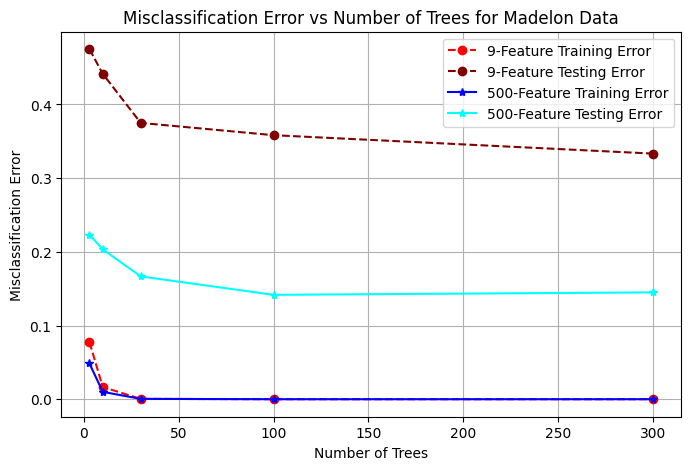

In [115]:
# Plot the training and test misclassification errors vs number of trees for madelon data
plt.figure(figsize=(8,5))
plt.plot(num_trees, nine_mad_train_errors, linestyle='--', marker='o', color='red', label='9-Feature Training Error')
plt.plot(num_trees, nine_mad_test_errors, linestyle='--', marker='o', color='maroon', label='9-Feature Testing Error')
plt.plot(num_trees, all_mad_train_errors, linestyle='-', marker='*', color='blue', label='500-Feature Training Error')
plt.plot(num_trees, all_mad_test_errors, linestyle='-', marker='*', color='cyan', label='500-Feature Testing Error')
plt.xlabel('Number of Trees')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error vs Number of Trees for Madelon Data')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
# Report in a table the minimum test error and its number of trees for madelon data
nine_min_test_error = np.min(nine_mad_test_errors)
nine_best_depth = num_trees[np.argmin(nine_mad_test_errors)]
all_min_test_error = np.min(all_mad_test_errors)
all_best_depth = num_trees[np.argmin(all_mad_test_errors)]
table = pd.DataFrame({
    'Category':['Minimum Testing Error (9 Features)', 'Best Tree Depth (9 Features)', 'Minimum Testing Error (500 Features)', 'Best Tree Depth (500 Features)'],
    'Value' : [nine_min_test_error, nine_best_depth, all_min_test_error, all_best_depth]
    })
print(table)

                               Category       Value
0    Minimum Testing Error (9 Features)    0.333333
1          Best Tree Depth (9 Features)  300.000000
2  Minimum Testing Error (500 Features)    0.141667
3        Best Tree Depth (500 Features)  100.000000
